In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.preprocessing import MinMaxScaler

In [2]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("akram24/google-stock-price-train")

# print("Path to dataset files:", path)

Path to dataset files: C:\Users\Admin\.cache\kagglehub\datasets\akram24\google-stock-price-train\versions\1


In [3]:
# Load Google stock price dataset
data = pd.read_csv('Google_Stock_Price_Train.csv',thousands=',')

In [4]:
data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,7380500
1,1/4/2012,331.27,333.87,329.08,666.45,5749400
2,1/5/2012,329.83,330.75,326.89,657.21,6590300
3,1/6/2012,328.34,328.77,323.68,648.24,5405900
4,1/9/2012,322.04,322.29,309.46,620.76,11688800


In [5]:
# Assume 'Close' is the target column for prediction
data = data[["Close"]]

In [6]:
data.shape

(1258, 1)

In [7]:
# Normalize the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

In [8]:
# Create sequences for time series prediction
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(sequence_length, len(data)):
        X.append(data[i-sequence_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

In [9]:
sequence_length = 60
X, y = create_sequences(data_scaled, sequence_length)

In [10]:
# Reshape input to be 3D for RNN [samples, time steps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [11]:
# Split into training and test sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [12]:
# Build RNN model
model = Sequential()
model.add(SimpleRNN(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(SimpleRNN(units=50))
model.add(Dense(units=1))  # Output layer

D:\SK\Programs\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 60, 50)              │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,701 (30.08 KB)

 Trainable params: 7,701 (30.08 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# Train model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 16s 124ms/step - loss: 0.0957 - val_loss: 0.0010
Epoch 2/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 0.0050 - val_loss: 6.2153e-04
Epoch 3/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0054 - val_loss: 5.7603e-04
Epoch 4/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0017 - val_loss: 6.5871e-04
Epoch 5/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.0016 - val_loss: 8.1333e-04
Epoch 6/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0018 - val_loss: 4.9785e-04
Epoch 7/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0019 - val_loss: 3.8924e-04
Epoch 8/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 9.1316e-04 - val_loss: 3.3420e-04
Epoch 9/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0015 - val_loss: 3.4304e-04
Epoch 10/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0015 - val_loss: 6.3073e-04
Epoch 11/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0015 - val_loss: 5.1437e-04
Epoch 12/20
27/27

In [16]:
# Evaluate model
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 3.1060e-04
Test Loss: 0.0003


In [17]:
# Predict
predicted_stock_price = model.predict(X_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step


In [18]:
# Inverse transform predictions
# Since model was trained on scaled values (between 0 and 1), we must inverse transform the predictions using the same scaler to get actual stock prices.
predicted_stock_price = scaler.inverse_transform(predicted_stock_price.reshape(-1, 1))
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

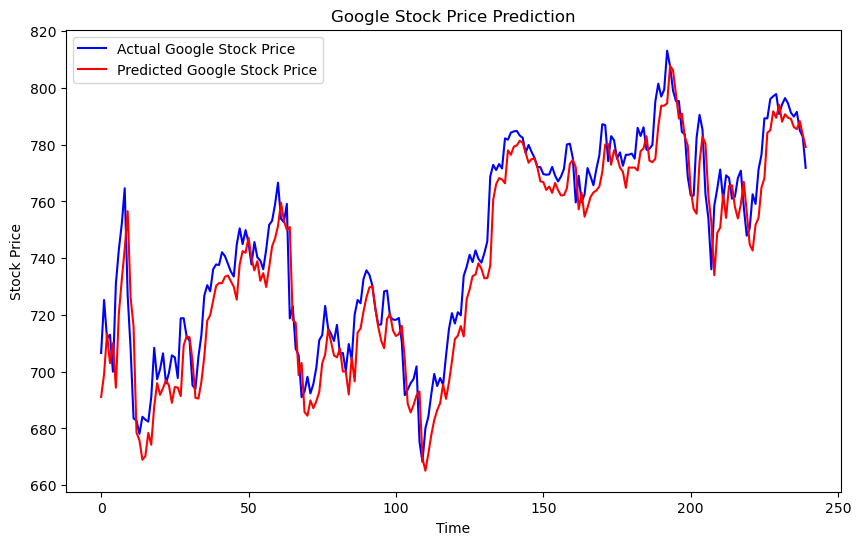

In [19]:
# Plot results
plt.figure(figsize=(10, 6))
plt.plot(y_test_scaled, color='blue', label='Actual Google Stock Price')
plt.plot(predicted_stock_price, color='red', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()